<img src="images\iris.png">
<img src="images\iris_3.gif">

In [18]:
#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

from sklearn.metrics.pairwise import pairwise_distances_argmin
from scipy.spatial.distance import cdist 
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn import tree

In [19]:
iris = pd.read_csv('data/iris.csv')

# Pivot

In [20]:
iris.groupby(['Name']).count()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


The datase contains:
- 50 seteosa
- 50 versicolor
- 50 virginica

In [21]:
iris.groupby(['Name']).mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


- setosa : small-size iris
- versicolor : medium-size iris
- virginica : large-size iris

# ETL

In [22]:
X = iris.drop(['Name'], axis=1)
y = iris['Name']

# Data Visualization

http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

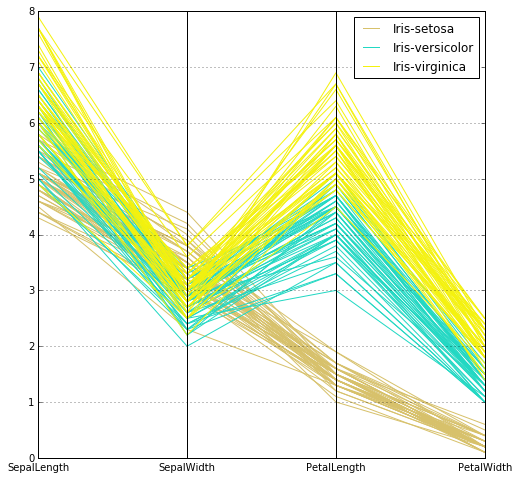

In [23]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(iris, 'Name')

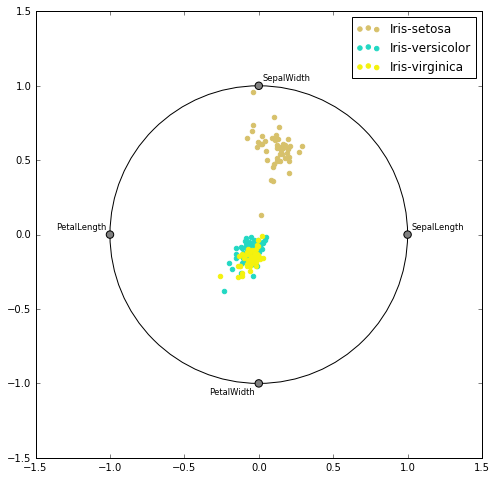

In [24]:
from pandas.plotting import radviz

plt.figure(figsize=(8,8))
radviz(iris, "Name")

In [25]:
#mappling or replacing

#iris = iris.replace({'Name': 'Iris-setosa'}, {'Name': '0'})
#iris = iris.replace({'Name': 'Iris-versicolor'}, {'Name': '1'})
#iris = iris.replace({'Name': 'Iris-virginica'}, {'Name': '2'})

#iris['Name'] = iris['Name'].convert_objects(convert_numeric=True)

#X = iris.drop(['Name'], axis=1)
#y = iris['Name']

#target_names = (['setosa', 'versicolor', 'virginica'])

# Kmeans clustering
http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

In [26]:
k_means = KMeans(init='k-means++', n_clusters=3, random_state=0)
k_means.fit(X)
k_means.labels_
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

In [27]:
print k_means_labels
print k_means_cluster_centers
print k_means_labels_unique

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
[0 1 2]


## Further analysis

In [28]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [29]:
pd.set_option('display.height', 500)

df2 = iris.join(df1)
df2

height has been deprecated.



,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


Virginica and Versicolor are quite similar. As a result:

- A few Versicolor are clustered as a category of Virginica
- Several Virginica are clustered as a category of Versicolor

In [30]:
df2.groupby(['cluster']).mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


# profiling
- cluster 1 : 
- cluster 2 : 
- cluster 3 : 

In [31]:
df2.groupby(['cluster']).count()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
cluster,,,,,
0,62,62,62,62,62
1,50,50,50,50,50
2,38,38,38,38,38


# Determining K Value

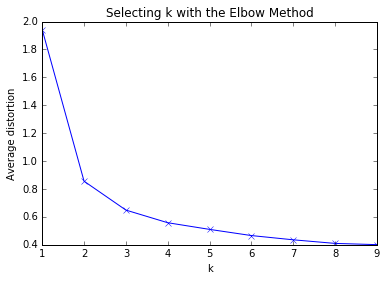

In [32]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#
#http://scikit-learn.org/stable/modules/clustering.html

K = range(1, 10) 
meandistortions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

#the graph suggest that 2 or 3 is a good value for K
#The average distortion improves rapidly as we increase  from 1 to 2 and 2 to 3. 
#There is little improvement for values of  greater than 3. 

In [33]:
#The Sihouette

#read this page ... https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_kmeans_silhouette_analysis.py
#http://scikit-learn.org/stable/modules/clustering.html

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

#The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
#The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

0.55259194454997573

In [34]:
#http://scikit-learn.org/stable/modules/clustering.html

kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans_model.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.49722797266401469

In [35]:
#adapted from http://scikit-learn.org/stable/modules/clustering.html

tests = [2, 3, 4, 5, 8]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    print metrics.silhouette_score(X, labels, metric='euclidean')

#the silhouette coefficient is greatest when it is equal to two. 
#Setting  equal to eight produces clusters of instances that are as close to each other as they are to the instances in some of the other clusters, 
#and the silhouette coefficient of these clusters is smallest.

0.680813620294
0.55259194455
0.497227972664
0.488517550889
0.350588885667


# Appendix

('For n_clusters =', 2, 'The average silhouette_score is :', 0.68081362029368153)


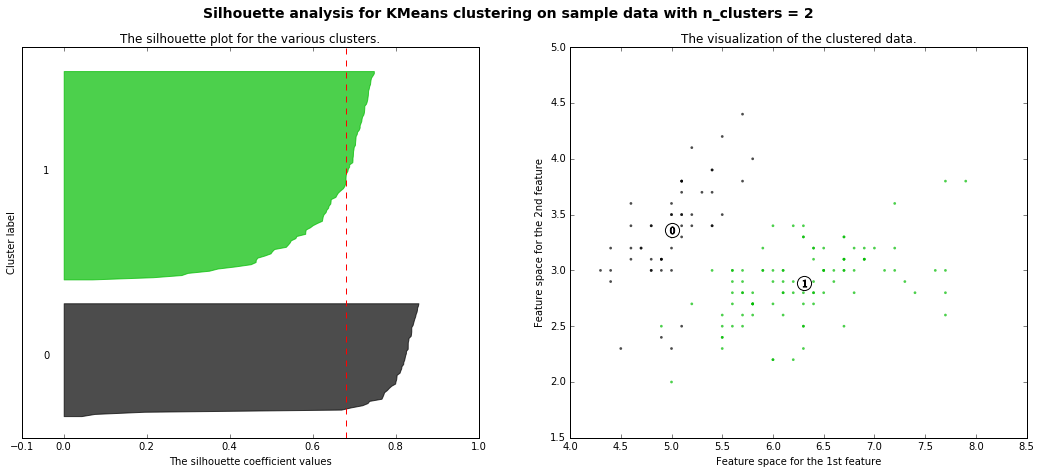

('For n_clusters =', 3, 'The average silhouette_score is :', 0.55259194454997573)


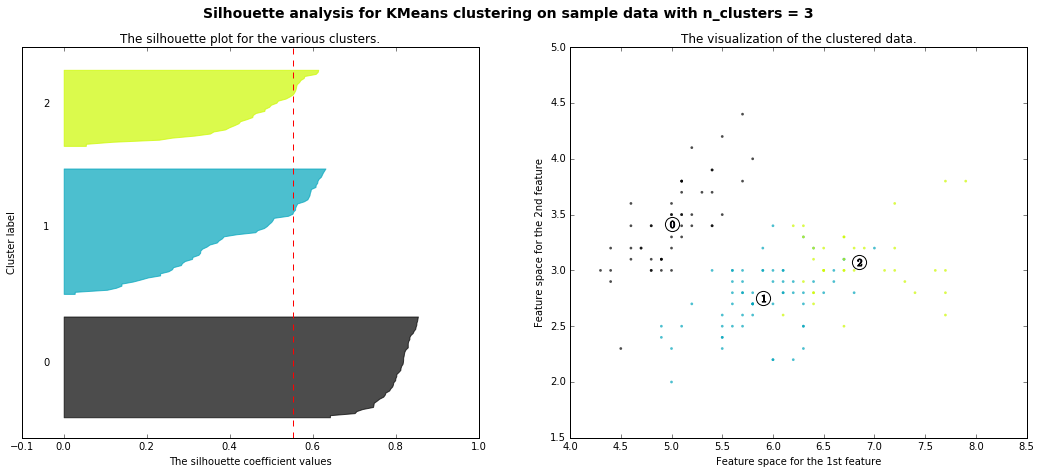

('For n_clusters =', 4, 'The average silhouette_score is :', 0.49782569010954719)


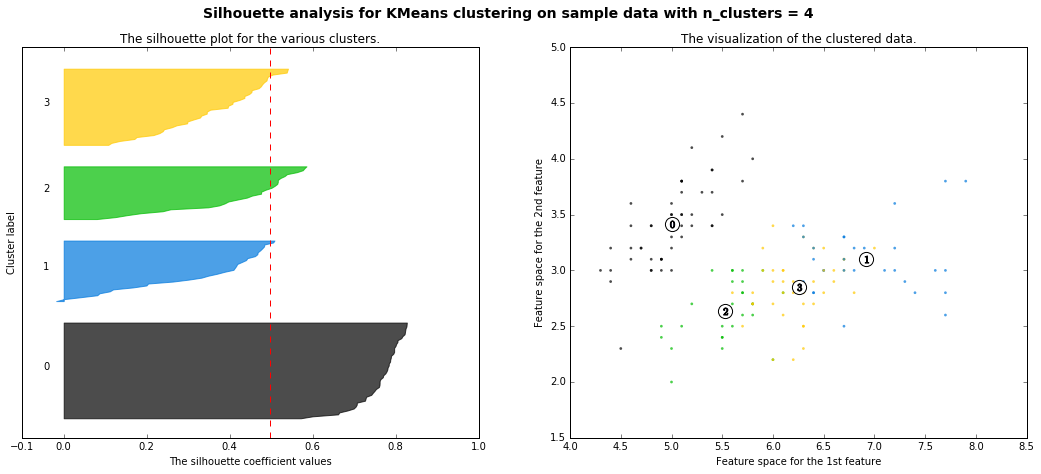

('For n_clusters =', 5, 'The average silhouette_score is :', 0.48851755088862792)


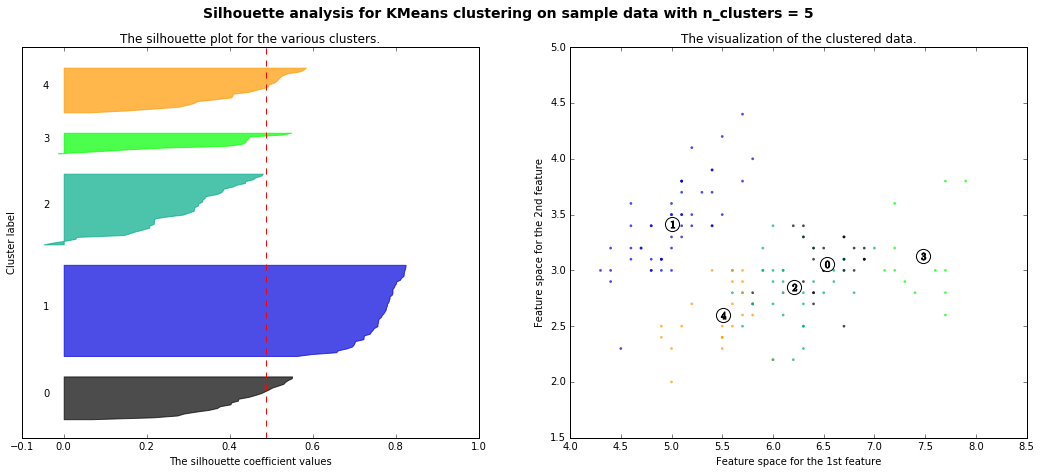

('For n_clusters =', 6, 'The average silhouette_score is :', 0.37121805054590096)


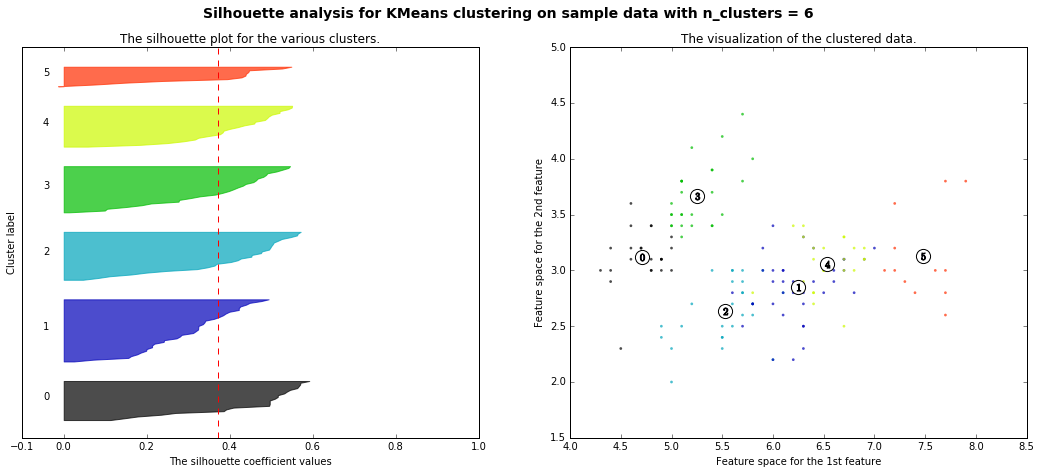

('For n_clusters =', 7, 'The average silhouette_score is :', 0.3600597997328463)


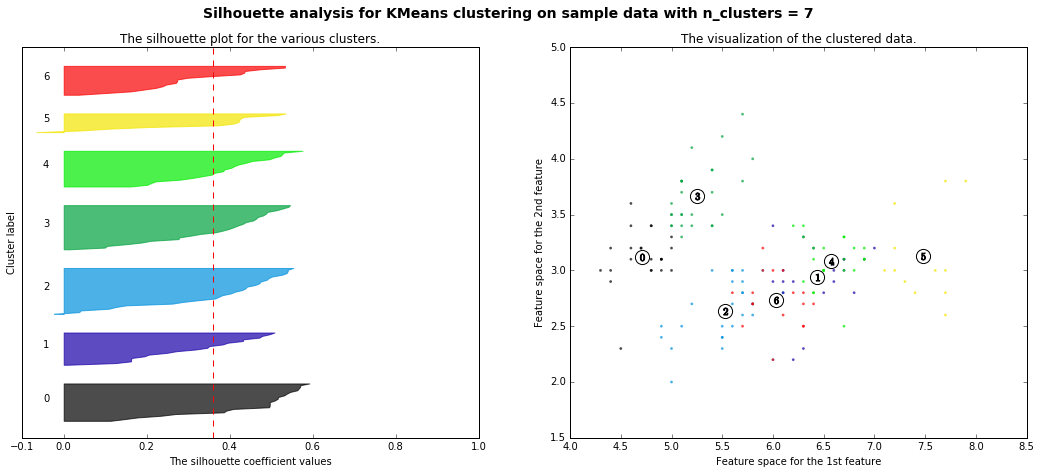

('For n_clusters =', 8, 'The average silhouette_score is :', 0.36037497080421538)


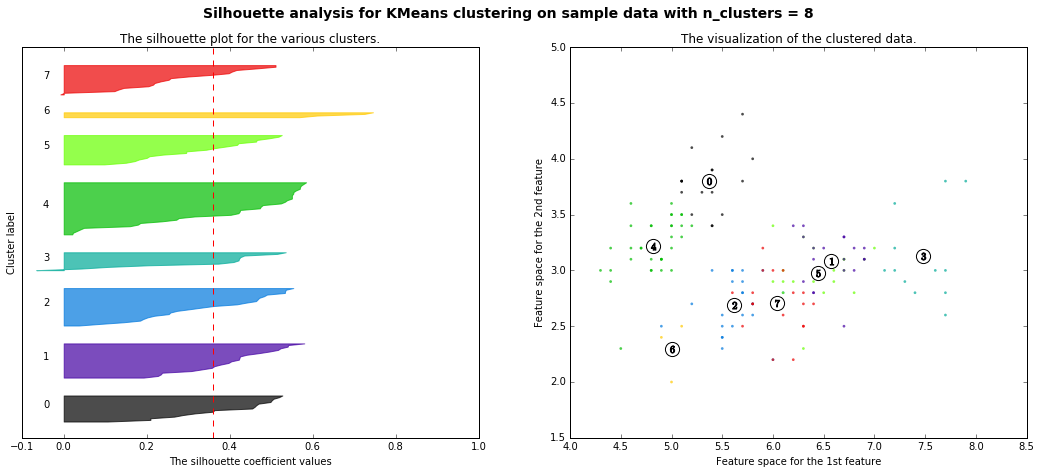

In [36]:
X = np.array(X)
y = np.array(y)


import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Normalizing data

In [37]:
df = X

In [38]:
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas

df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm

array([[ 0.20978632,  0.00465812, -0.26457265, -0.4184188 ],
       [ 0.1841453 , -0.05944444, -0.26457265, -0.4184188 ],
       [ 0.15850427, -0.03380342, -0.27739316, -0.4184188 ],
       [ 0.14568376, -0.04662393, -0.25175214, -0.4184188 ],
       [ 0.19696581,  0.01747863, -0.26457265, -0.4184188 ],
       [ 0.24824786,  0.05594017, -0.22611111, -0.39277778],
       [ 0.14568376, -0.00816239, -0.26457265, -0.40559829],
       [ 0.19696581, -0.00816239, -0.25175214, -0.4184188 ],
       [ 0.12004274, -0.07226496, -0.26457265, -0.4184188 ],
       [ 0.1841453 , -0.04662393, -0.25175214, -0.43123932],
       [ 0.24824786,  0.03029915, -0.25175214, -0.4184188 ],
       [ 0.17132479, -0.00816239, -0.23893162, -0.4184188 ],
       [ 0.17132479, -0.05944444, -0.26457265, -0.43123932],
       [ 0.10722222, -0.05944444, -0.30303419, -0.43123932],
       [ 0.29952991,  0.06876068, -0.29021368, -0.4184188 ],
       [ 0.2867094 ,  0.12004274, -0.25175214, -0.39277778],
       [ 0.24824786,  0.

In [39]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means.fit(X)
k_means.labels_
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)

In [40]:
print k_means_labels
print k_means_cluster_centers
print k_means_labels_unique

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[ 6.85        3.07368421  5.74210526  2.07105263]
 [ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]]
[0 1 2]


In [41]:
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [42]:
df_norm = pd.DataFrame(df_norm)
df2 = df_norm.join(df1)
df2

,0,1,2,3,cluster
0,0.209786,0.004658,-0.264573,-0.418419,1
1,0.184145,-0.059444,-0.264573,-0.418419,1
2,0.158504,-0.033803,-0.277393,-0.418419,1
3,0.145684,-0.046624,-0.251752,-0.418419,1
4,0.196966,0.017479,-0.264573,-0.418419,1
5,0.248248,0.055940,-0.226111,-0.392778,1
6,0.145684,-0.008162,-0.264573,-0.405598,1
7,0.196966,-0.008162,-0.251752,-0.418419,1
8,0.120043,-0.072265,-0.264573,-0.418419,1
9,0.184145,-0.046624,-0.251752,-0.431239,1


**Normalization of data does not make any difference in the iris dataset since the scale is almost same across X variables**

In [43]:
df2.groupby(['cluster']).count()

,0,1,2,3
cluster,,,,
0,38,38,38,38
1,50,50,50,50
2,62,62,62,62


In [44]:
df2.describe()

,0,1,2,3,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.305085,-0.052521,0.037821,-0.290385,1.160000
std,0.106162,0.055589,0.226208,0.097841,0.803349
min,0.107222,-0.187650,-0.315855,-0.431239,0.000000
25%,0.209786,-0.085085,-0.238932,-0.405598,0.250000
50%,0.299530,-0.059444,0.113632,-0.277393,1.000000
75%,0.376453,-0.020983,0.209786,-0.213291,2.000000
max,0.568761,0.120043,0.440556,-0.123547,2.000000


# Appendix

## Hierarchical: Agglomerative clustering with different metrics
http://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [45]:
iris = pd.read_csv('data/iris.csv')

In [46]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [47]:
X = iris.drop(['Name'], axis=1)
y = iris['Name']

In [48]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [49]:
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [50]:
df2 = X.join(df1)
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
cluster        150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


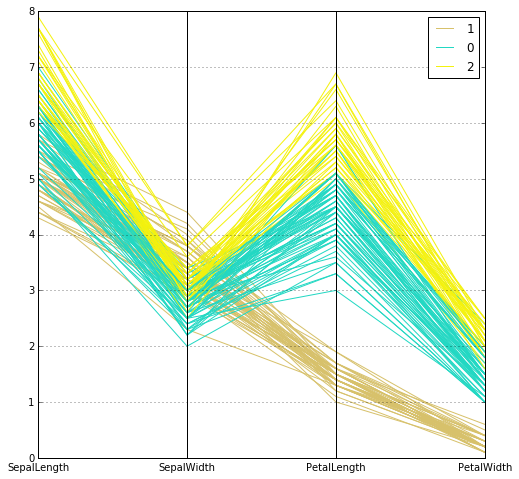

In [52]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,8))
parallel_coordinates(df2, 'cluster')

In [53]:
df2.groupby(['cluster']).mean()
#this shows "Gender" is an important factor 

#profiling 
# cluster 0: 
# cluster 1: 
# cluster 2: 

,SepalLength,SepalWidth,PetalLength,PetalWidth
cluster,,,,
0,5.920313,2.751563,4.420313,1.434375
1,5.006000,3.418000,1.464000,0.244000
2,6.869444,3.086111,5.769444,2.105556


In [54]:
df2.groupby(['cluster']).count()

,SepalLength,SepalWidth,PetalLength,PetalWidth
cluster,,,,
0,64,64,64,64
1,50,50,50,50
2,36,36,36,36


3D chart http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

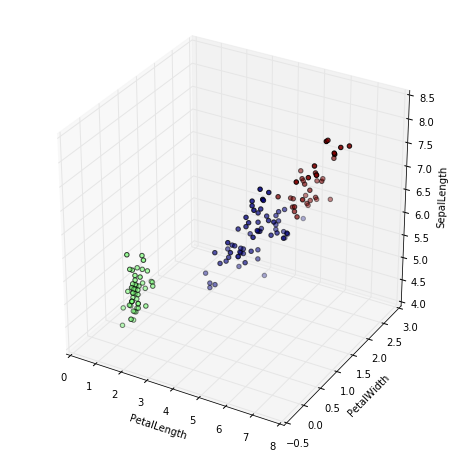

In [55]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

x = df2['PetalLength']
y = df2['PetalWidth']
z = df2['SepalLength'] 
colors = df2['cluster']

ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('PetalLength')
ax.set_ylabel('PetalWidth')
ax.set_zlabel('SepalLength')

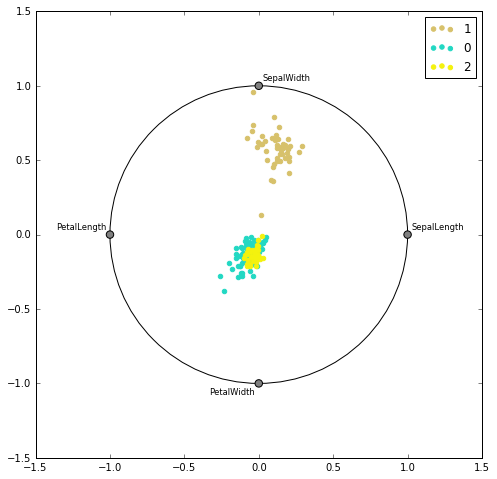

In [56]:
from pandas.plotting import radviz

plt.figure(figsize=(8,8))
radviz(df2, "cluster")

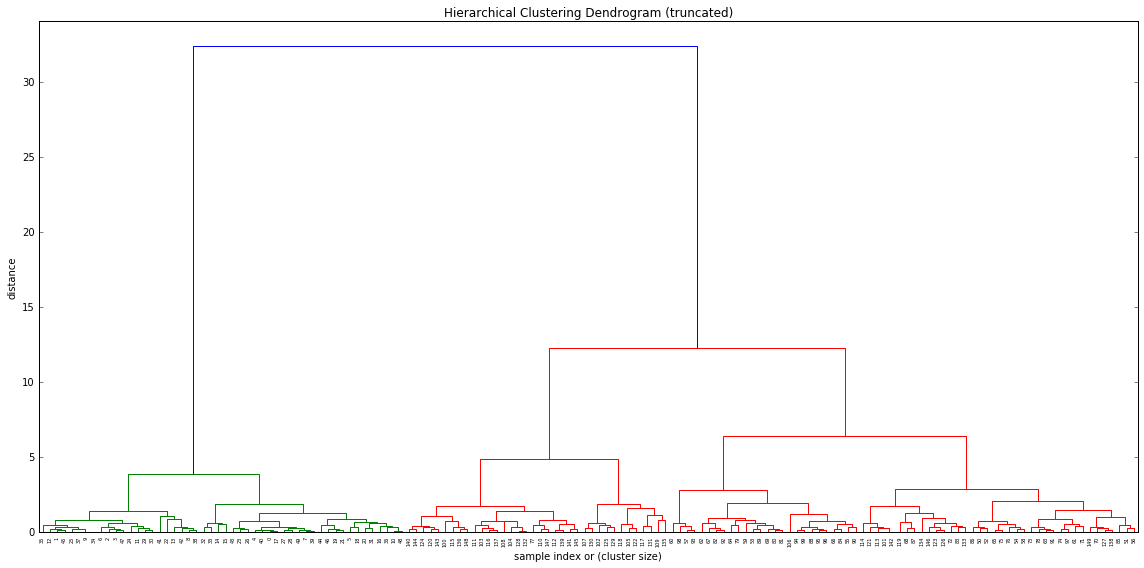

In [62]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

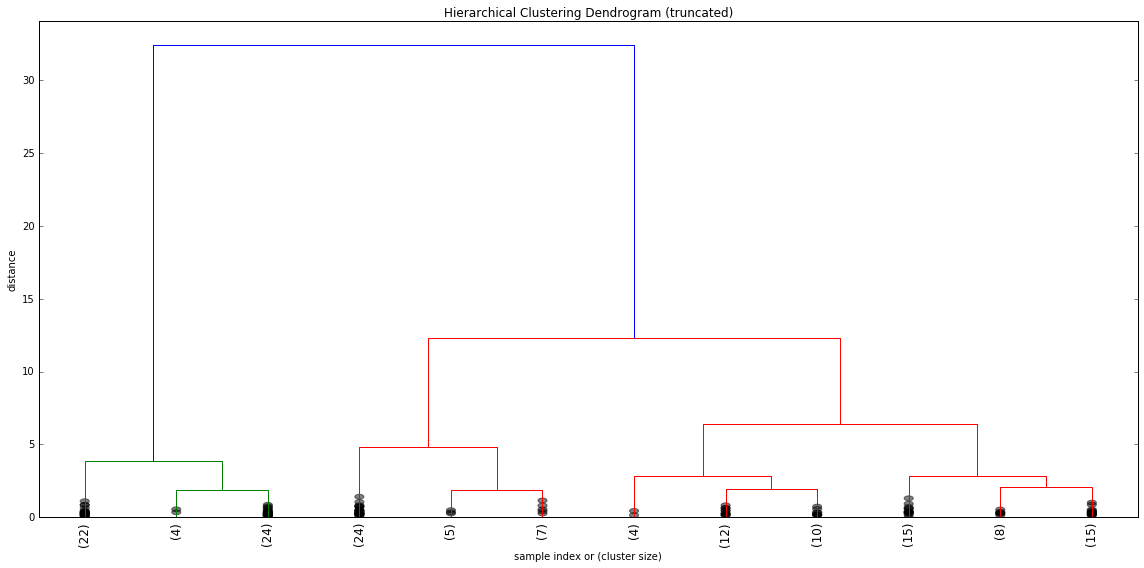

In [59]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top"
          )
plt.tight_layout() # fixes margins